# Proyecto de Preprocesamiento de Datos

In [35]:
import pandas as pd
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier

## Paso 1 - Lectura de los datos:


In [23]:
df = pd.read_csv ('/workspaces/machine-learning-python-template-clara/data/raw/AB_NYC_2019.csv').iloc[:,1:]

pd.set_option('display.max_columns', None)

df.head()



,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [24]:
df.shape

(48895, 15)

## Paso 2 - Análisis de Constantes

In [25]:
n_unicos = df.nunique()
n_unicos

name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [26]:
# Revisamos que no tengamos anuncios duplicados
df.duplicated().sum()

np.int64(0)

In [27]:
# Descripción básica de las columnas numéricas
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,48879,47905,Hillside Hotel,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48895.0,NaN,NaN,NaN,67620010.64661,78610967.032667,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
host_name,48874,11452,Michael,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48895,5,Manhattan,21661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48895.0,NaN,NaN,NaN,40.728949,0.05453,40.49979,40.6901,40.72307,40.763115,40.91306
longitude,48895.0,NaN,NaN,NaN,-73.95217,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
room_type,48895,3,Entire home/apt,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48895.0,NaN,NaN,NaN,152.720687,240.15417,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,NaN,NaN,NaN,7.029962,20.51055,1.0,1.0,3.0,5.0,1250.0


In [28]:
# Revisamos los valores faltantes
df.isnull().mean()*100

name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

<Axes: >

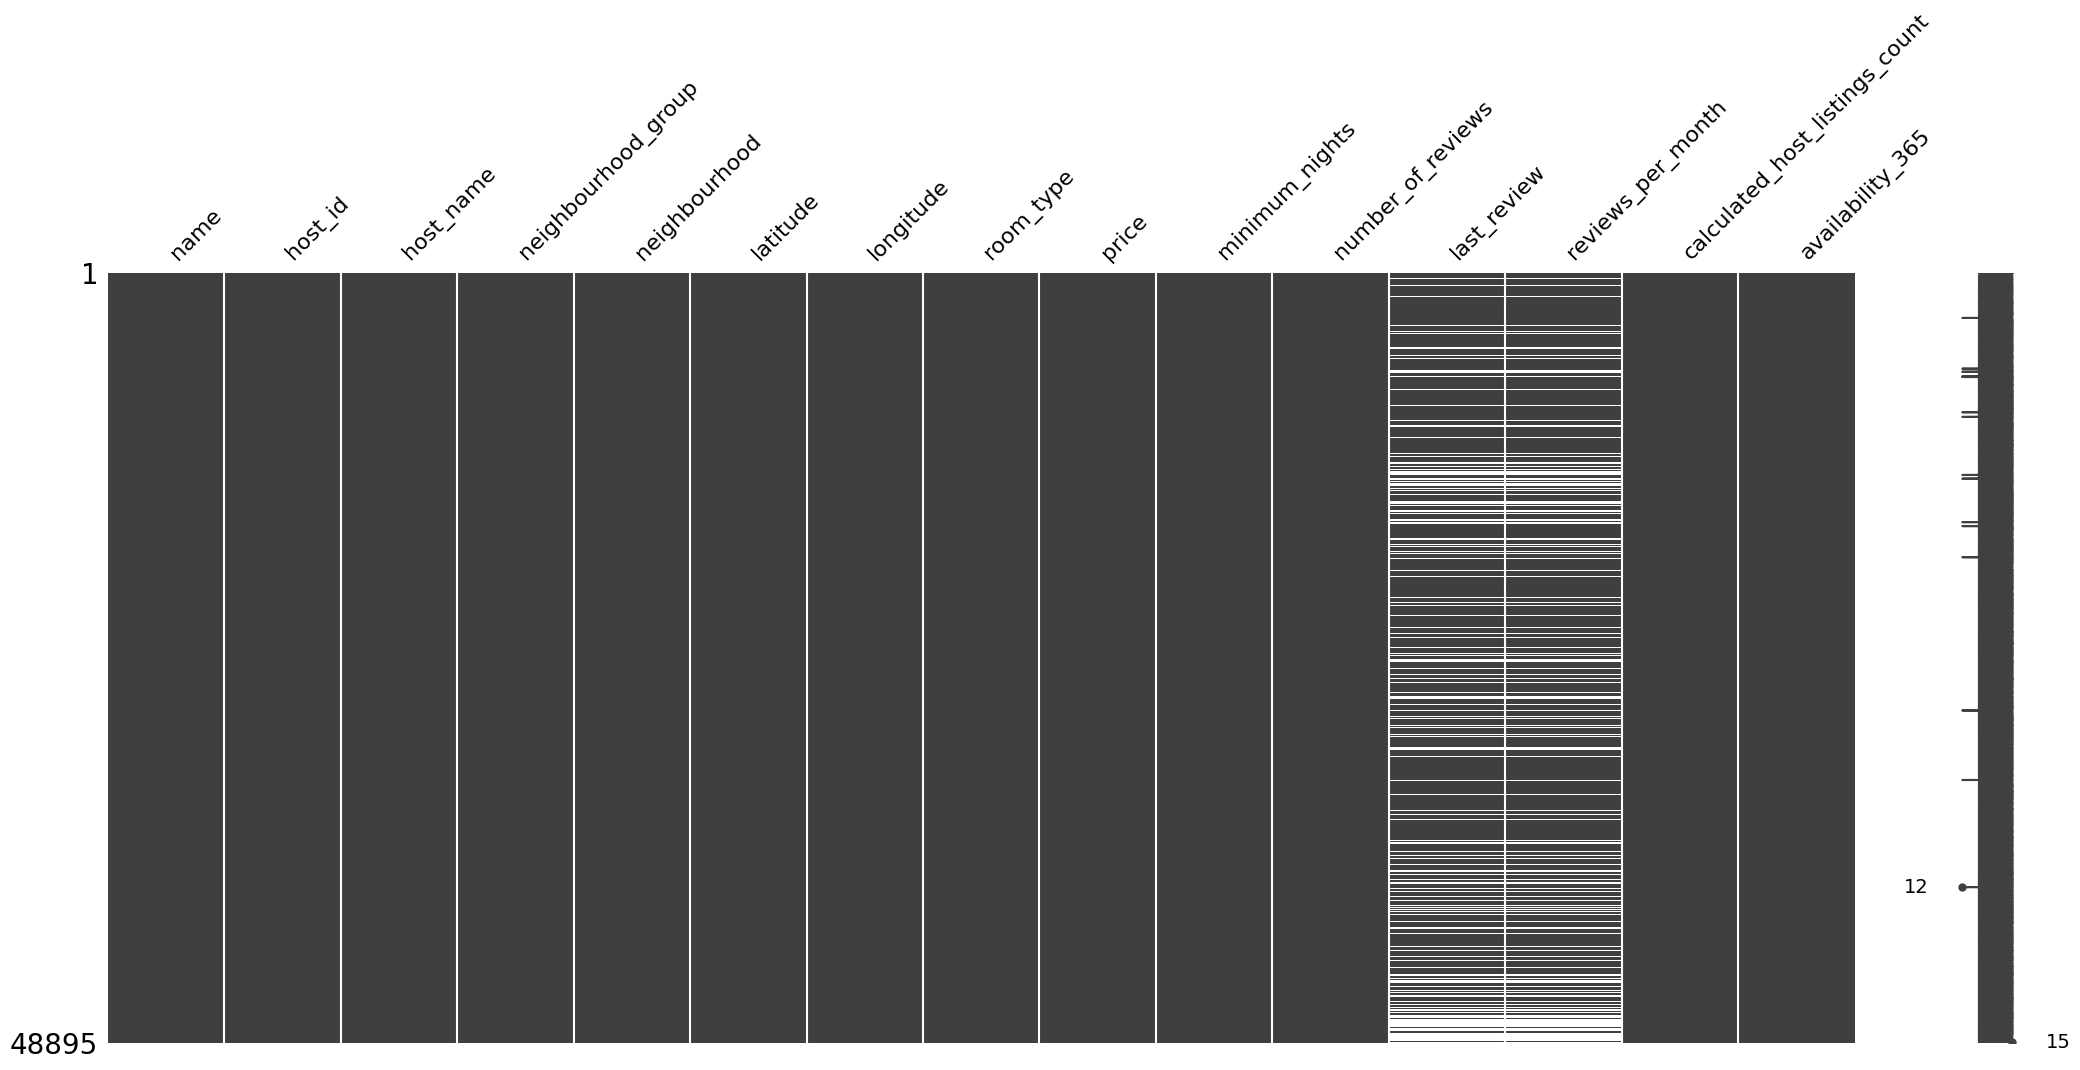

In [29]:
msno.matrix(df)

In [30]:
# Comprobamos el porcentaje de anuncios que presentan al menos un valor faltante
df.isnull().any(axis=1).mean()*100

np.float64(20.603333674199817)

In [31]:
# Eliminamos la columna CONSTRUCTIONYEAR ya que más de la mitad de sus valores son faltantes
df.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True)

In [32]:
# Comprobamos el porcentaje de anuncios que presentan al menos un valor faltante
df.isnull().any(axis=1).mean()*100

np.float64(0.07567235913692606)

In [ ]:
# Eliminamos la columna CONSTRUCTIONYEAR ya que más de la mitad de sus valores son faltantes
df.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True)

In [34]:
# Imputamos los valores faltantes usando el algoritmo knn
imputador_knn = KNNImputer(n_neighbors=3)
df_imputado = pd.DataFrame(imputador_knn.fit_transform(df), columns=df.columns)

ValueError: could not convert string to float: 'Clean & quiet apt home by the park'